<a href="https://colab.research.google.com/github/ShaluSenthilnathan/Medical_Insurance_Cost_Prediction_Using_ML/blob/master/Medical_Insurance_Cost_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MEDICAL INSURANCE COST PREDICTION USING MACHINE LEARNING**

**Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Data Collection and Analysis**

In [ ]:
#loading the data from cs file to pandas dataframe

insurance_dataset = pd.read_csv('/content/Train_Data.csv')

In [ ]:
#obtaining the first 5 rows of the database to see the column names

insurance_dataset.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,1,25.745000,0,2,2,3279.868550
1,36.976978,0,25.744165,1,0,3,21454.494239
2,18.000000,1,30.030000,0,0,1,1720.353700
3,37.000000,1,30.676891,0,2,3,6801.437542
4,58.000000,1,32.010000,0,0,1,11946.625900


In [ ]:
#obtaining the number of rows and columns of the dataset

insurance_dataset.shape

(3630, 7)

In [ ]:
#obtaining information about the dataset

insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   int64  
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 198.6+ KB


In [ ]:
#checking if there are any null values in the dataset

insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [ ]:
#obtaining information about the data - such as mean , max value , min value , std deviation etc,.(basically the statistical features of the data)

insurance_dataset.describe()

#explanation below - 25%ile of data rows have age below 29

,age,sex,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,0.558953,30.629652,2.503581,12784.808644
std,12.151029,0.496581,5.441307,1.712568,10746.166743
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,29.000000,0.000000,26.694526,1.000000,5654.818262
50%,39.170922,1.000000,30.200000,3.000000,9443.807222
75%,48.343281,1.000000,34.100000,4.000000,14680.407505
max,64.000000,1.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

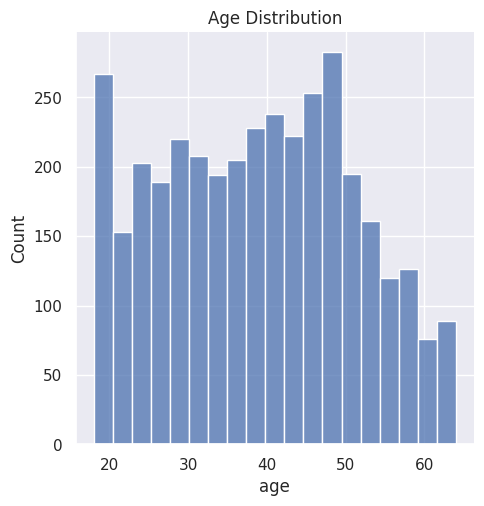

In [ ]:
#distribution of age data
#age is a numerical data

sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Sex Distribution')

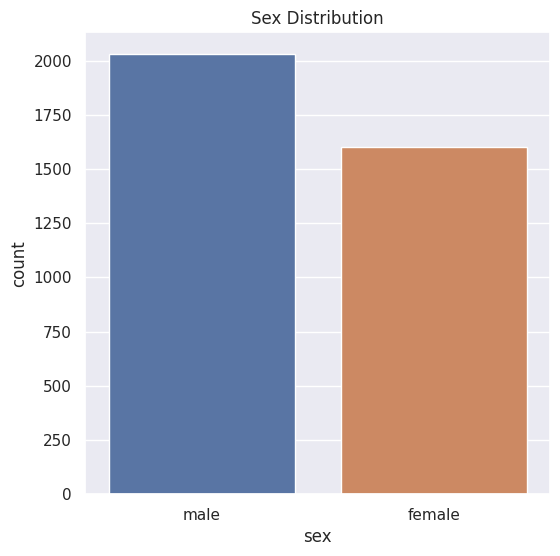

In [ ]:
#since sex is a categorical feature(m/f/o)

plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title("Sex Distribution")

In [ ]:
#get the count of males and females

insurance_dataset['sex'].value_counts()

male      2029
female    1601
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

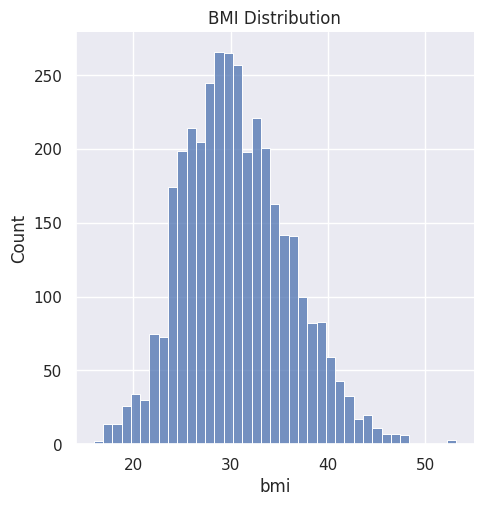

In [ ]:
#distribution of bmi
#bmi is a numerical column (normal range 18.5 to 24.9)

sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

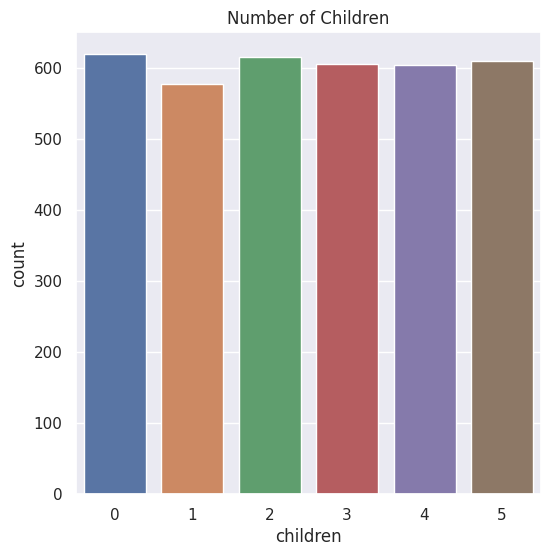

In [ ]:
#children count

plt.figure(figsize=(6,6))
sns.countplot(x="children",data=insurance_dataset)
plt.title('Number of Children')
plt.show()

In [ ]:
#getting the count of number of children

insurance_dataset['children'].value_counts()

0    619
2    615
5    610
3    605
4    604
1    577
Name: children, dtype: int64

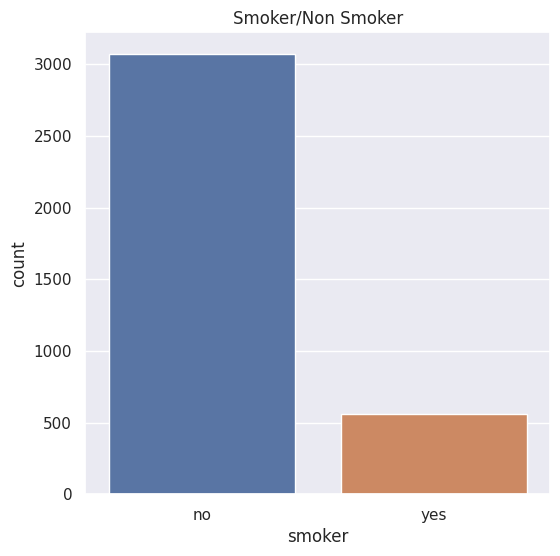

In [ ]:
#smoker data(its a categorical data since its either Y/N)

plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=insurance_dataset)
plt.title('Smoker/Non Smoker')
plt.show()

In [ ]:
#getting the count of number of smokers and non-smokers

insurance_dataset['smoker'].value_counts()

no     3070
yes     560
Name: smoker, dtype: int64

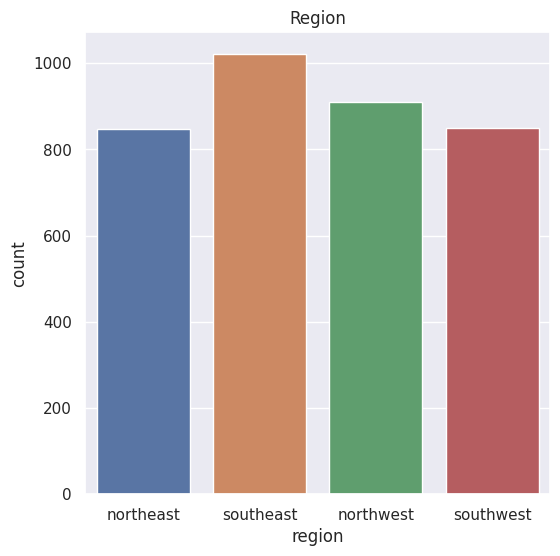

In [ ]:
#region data analysis (again this is a categorical data)

plt.figure(figsize=(6,6))
sns.countplot(x="region",data=insurance_dataset)
plt.title('Region')
plt.show()

In [ ]:
#getting the count of each region

insurance_dataset['region'].value_counts()

southeast    1021
northwest     911
southwest     850
northeast     848
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

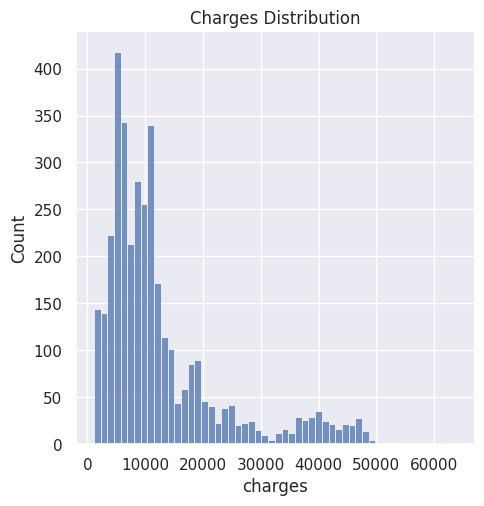

In [ ]:
#charges analysis

plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()


**Data Preprocessing**

Encoding Categorical Features

In [ ]:
#text cannot be understood by the model, they understand numerical values well - hence what we do is for example we set male to 0 anf female to 1 in case of gender column
#similarly we do the same for regions as well - this process is called as encoding
#so below we are going to encode all the categorical features

#encoding sex column
insurance_dataset.replace({'sex': {'male': 1, 'female': 0}}, inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':1,'no':0}},inplace=True)

#the inplace=True parameter in pandas is used to indicate whether the changes made to a DataFrame should be applied directly to the original DataFrame or if a new modified DataFrame should be returned.

#encoding regions
insurance_dataset.replace({'region':{'northwest':3,'southwest':1,'northeast':2,'southeast':0}},inplace=True)



Splitting Target and Features

In [ ]:
#target here is the cost of the insurance , rest all are features that decide the target
X = insurance_dataset.drop(columns='charges',axis=1) #removing a column hence mention axis=1 , if we r removing a row then mention axis=0
Y = insurance_dataset['charges']

#therefore X has all columns except charges and Y just has charges column
print(X)
print(Y)

            age  sex        bmi  smoker  region  children
0     21.000000    1  25.745000       0       2         2
1     36.976978    0  25.744165       1       0         3
2     18.000000    1  30.030000       0       0         1
3     37.000000    1  30.676891       0       2         3
4     58.000000    1  32.010000       0       0         1
...         ...  ...        ...     ...     ...       ...
3625  48.820767    0  41.426984       0       3         4
3626  38.661977    0  26.202557       0       0         2
3627  56.000000    1  40.300000       0       1         0
3628  48.061207    0  34.930624       0       0         1
3629  37.598865    0  25.219233       0       2         3

[3630 rows x 6 columns]
0        3279.868550
1       21454.494239
2        1720.353700
3        6801.437542
4       11946.625900
            ...     
3625    10987.324964
3626    11735.844352
3627    10602.385000
3628     8976.140452
3629     7027.698968
Name: charges, Length: 3630, dtype: float64


Splitting data into training data and testing data


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2) #lhs represents 4 arrays
#0.2 indicates that 20% is test data
#random_state=2 indicates to split the data in same manner in two different instances(need clarity in this)



In [ ]:
print(X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
#printing totally how many r there , in that how many refer to test data and train data respectively

(3630, 6) (2904, 6) (726, 6) (2904,) (726,)


Model Training(Using Linear Regression)

In [ ]:
#loading the linear regression model
regressor = LinearRegression()

regressor.fit(X_train,Y_train) #plot the line graph for the training data

LinearRegression()

Model Evaluation


In [ ]:
#prediction on training data (we also do prediction on training data inroder to avoid overfitting(case wherin model over learns))
training_data_prediction = regressor.predict(X_train)  #just inputting the X value and the model has to predict the Y value

#R squared value
r2_train = metrics.r2_score(Y_train,training_data_prediction) #comparing the original label and the values printed by our model
print("R squared value: ",r2_train)

R squared value:  0.6969959791129544


In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)  #just inputting the X value and the model has to predict the Y value

#R squared value
r2_test = metrics.r2_score(Y_test,test_data_prediction) #comparing the original label and the values printed by our model
print("R squared value: ",r2_test)

R squared value:  0.7548725700771286


In [ ]:
#Note - the r squared value for traning data and testing data shoould be nearby inrder to avoid the case of overfitting

Build Predictive System

In [ ]:
#select random data set without including charges
#the model should output the the charges value

#sample data
input_data = (40,1,29.9,0,1,2)
#the above is a tuple , so change it to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the above array
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)  #if reshape is not mentioned then the model doesnt know that only row data is being inputted to it for predicting

#find the prediction
prediction = regressor.predict(input_data_reshape)
print(prediction)

#the above print statement mentions the output as a list , inorder to print it just as a number without the tuple brackets
print("The insurance cost is",prediction[0]) #since it has just one value in the tuple  - prediction[0]

[9579.97727261]
The insurance cost is 9579.977272605096


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
